In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import easygui
import PySimpleGUI as sg
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.layouts import gridplot, layout
from korbash_lib import PlotDisplayer
output_notebook()

Loading BokehJS ...

In [22]:
part=sg.PopupGetFile(message='chouse', default_path=r"C:\Users\Fiber\Desktop\table_control_data\tenshion_data",modal=True)
data=pd.read_csv(part)
data.head()

,time,tension,tensionWgl,tensionEXPgl,power,motorL,motorR,motorM,dt,pressure,x,L,vL,vR,vM,aL,aR,aM,VdifRec
0,0.0075,50.090092,NaN,NaN,3.881084,84.278807,84.254765,37.0,0.015,50.149149,0.024042,-0.012021,0.000000,0.000000,0.0,0.0,0.0,0.0,0.015194
1,0.2600,49.285636,NaN,NaN,3.880354,84.219657,84.313915,37.0,0.010,49.343746,0.024042,0.047129,-0.909999,0.909999,0.0,-7.0,7.0,0.0,0.015194
2,0.4500,49.509445,NaN,NaN,3.881416,83.913655,84.619917,37.0,0.016,49.567818,0.024042,0.353131,-2.261001,2.261001,0.0,-7.0,7.0,0.0,0.015194
3,0.6160,49.868173,NaN,NaN,3.881283,83.493664,85.039908,37.0,0.010,49.926969,0.024042,0.803122,-3.000000,3.000000,0.0,0.0,0.0,0.0,0.015194
4,0.7900,50.458948,NaN,NaN,3.881018,83.001664,85.531908,37.0,0.030,50.518441,0.024042,1.355122,-3.000000,3.000000,0.0,0.0,0.0,0.0,0.015194


In [8]:
data.drop(np.arange(0,5),inplace=True)

In [24]:
data['dv']=abs(data['vL']+data['vR'])

In [27]:
data['motorR']=data['motorR']-data['motorR'].mean()
data['motorR']=data['motorR']/data['motorR'].std()
data['motorL']=data['motorL']-data['motorL'].mean()
data['motorL']=data['motorL']/data['motorL'].std()
data['tension']=data['tension']-data['tension'].mean()
data['tension']=data['tension']/data['tension'].std()
#data['dv']=data['dv']-data['dv'].mean()
data['dv']=data['dv']/data['dv'].std()
data['power']=data['power']-data['power'].mean()
data['power']=data['power']/data['power'].std()

In [28]:
pl=PlotDisplayer(vse=data[['time','tension','power','dv']])
pl.Show()

In [14]:
data['tension']=data['tension']/5

In [16]:
data['motorR_coord']=(data['motorR_coord']-50)/20

In [7]:
q.plot()

NameError: name 'q' is not defined

<AxesSubplot:xlabel='time'>

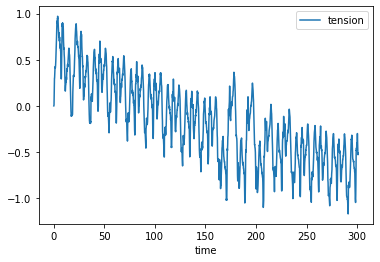

In [15]:
data.plot(x='time',y='tension')


In [13]:
data['tension']

1      -0.000933
2       0.023632
3       0.043360
4       0.525746
5       1.101555
          ...   
2340   -1.920197
2341   -2.419666
2342   -2.518531
2343   -2.647782
2344   -2.566075
Name: tension, Length: 2344, dtype: float64

<AxesSubplot:xlabel='time'>

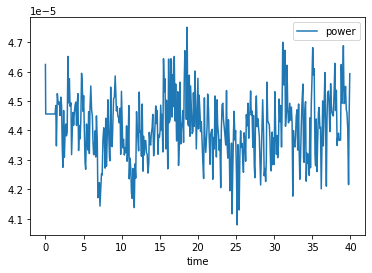

In [6]:
data.plot(x='time',y='power')


In [22]:
pl_motor_t = figure(plot_width=1980, plot_height=1400, sizing_mode="scale_both")
pl_m_r = pl_motor_t.line(x='time',y='motorR_coord' ,source=data, legend_label="motorR", line_color="red")
pl_m_m = pl_motor_t.line(x='time',y='tension' ,source=data, legend_label="dL_coord", line_color="green")
grid=layout([
    [pl_motor_t],
])

In [53]:
show(grid)

In [52]:
pl_motor_t = figure(plot_width=1380, plot_height=1000, sizing_mode="scale_both")
pl_m_r = pl_motor_t.line(x='time',y='tension' ,source=data, legend_label="tension", line_color="red")
pl_m_m = pl_motor_t.line(x='time',y='dL_coord' ,source=data, legend_label="dL_coord", line_color="green")
grid=layout([
    [pl_motor_t],
])